# Multiple Linear Regression using the Ordinary Least Squares (OLS)

                            OLS Regression Results                            
Dep. Variable:         Execution_time   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.700e+04
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        02:05:00   Log-Likelihood:                -817.06
No. Observations:                 425   AIC:                             1644.
Df Residuals:                     420   BIC:                             1664.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

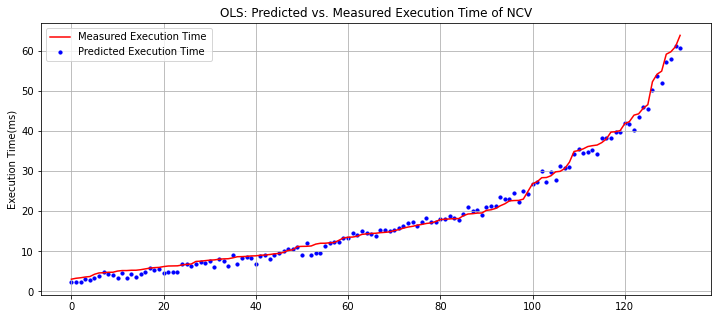

In [2]:
from time import time
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv("training_data.csv")
x_train = df[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
y_train = df['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
y_valid = valid['Execution_time']


df_pred = pd.read_csv("test_data_NCV.csv")
x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
y_test = df_pred['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']

# df = pd.read_csv("training_data.csv")
# x_train = df[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']

# df = pd.read_csv("training_data.csv")
# x_train = df[["Total_number_of_FLOPs"]]
# y_train = df['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs"]] 
# y_test = df_pred['Execution_time']


x_train = sm.add_constant(x_train)
start = time()
olsmod = sm.OLS(y_train, x_train)
olsres = olsmod.fit()
stop = time()
training_time = stop-start

print(olsres.summary())

# predict on validation data
x_valid = sm.add_constant(x_valid)
y_valid_pred = olsres.predict(x_valid)

# Calculate percentage error
per_err = (y_valid - y_valid_pred) / y_valid

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE_valid = sum(per_err)/len(per_err)

x_test = sm.add_constant(x_test)
y_pred = olsres.predict(x_test)


# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE_test = sum(per_err)/len(per_err)
  
# Print the MAPE value 
print(f'''
MAPE during training of OLS : { round(MAPE_valid, 2) }
MAPE during testing of OLS  : { round(MAPE_test, 2) }
training time : {training_time}

''')

index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("OLS: Predicted vs. Measured Execution Time of NCV")
plt.show()

# Multi-Layer Perceptrons (MLP)

# The numerber of hidden layer: 0

Model: "sequential_216"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_617 (Dense)            (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
17/17 [==============================] - 0s 597us/step - loss: 889.4939
Epoch 2/200
17/17 [==============================] - 0s 576us/step - loss: 390.0440
Epoch 3/200
17/17 [==============================] - 0s 537us/step - loss: 187.1532
Epoch 4/200
17/17 [==============================] - 0s 517us/step - loss: 96.4847
Epoch 5/200
17/17 [==============================] - 0s 473us/step - loss: 53.9056
Epoch 6/200
17/17 [==============================] - 0s 567us/step - loss: 32.6670
Epoch 7/200
17/17 [==============================] - 0s 502us/step - loss: 21.9777
Epoch 8/200
17/17 [==============================] - 0s 502us/step -

17/17 [==============================] - 0s 749us/step - loss: 6.8981
Epoch 191/200
17/17 [==============================] - 0s 789us/step - loss: 6.8900
Epoch 192/200
17/17 [==============================] - 0s 749us/step - loss: 6.8885
Epoch 193/200
17/17 [==============================] - 0s 789us/step - loss: 6.8946
Epoch 194/200
17/17 [==============================] - 0s 777us/step - loss: 6.8910
Epoch 195/200
17/17 [==============================] - 0s 767us/step - loss: 6.8978
Epoch 196/200
17/17 [==============================] - 0s 718us/step - loss: 6.8971
Epoch 197/200
17/17 [==============================] - 0s 764us/step - loss: 6.8927
Epoch 198/200
17/17 [==============================] - 0s 770us/step - loss: 6.8933
Epoch 199/200
17/17 [==============================] - 0s 761us/step - loss: 6.8927
Epoch 200/200
17/17 [==============================] - 0s 741us/step - loss: 6.8923
MAPE of MLP  :        0
0  42.99,  

Training time : 2.929119825363159s
     


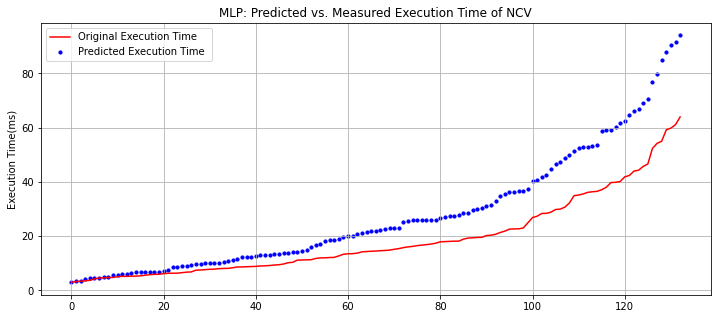

In [27]:
from time import time
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from itertools import product
from pandas.core.frame import DataFrame
import numpy as np
import csv
import matplotlib.pyplot as plt


# train = pd.read_csv("training_data+valid_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data+valid_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data+valid_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)
MAPE_default=10000
MAPE_better=MAPE_default

start = time()
    
model = tf.keras.Sequential(
                            tf.keras.layers.Dense(1, input_shape = x_train.shape[1:]))

model.compile(loss = tf.losses.mean_squared_error,
             optimizer = 'sgd')
model.summary()
history = model.fit(x_train, y_train, epochs=200)
stop = time()
training_time = stop-start
y_pred = model.predict(x_test)

y_test  = np.array(y_test).reshape(-1,1)

# Calculate percentage error
per_err = (y_test - y_pred) / y_test
#print(per_err)

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)


stop = time()

MAPE = DataFrame(MAPE)  
# Print the MAPE value 
print(f"""MAPE of MLP  : {round(MAPE, 2)},  

Training time : {training_time}s
     """)

y_test_sort=np.sort(y_test,axis=0)
y_pred_sort=np.sort(y_pred,axis=0)
# plt.figure(figsize=(13,6))
# plt.plot(np.arange(len(y_test)),y_test_sort,"r",label="original execution time")
# plt.scatter(np.arange(len(y_pred)),y_pred_sort,s=10,c="b",label="prediced execution time ")
# plt.legend(loc="upper left")
# plt.grid()
# plt.xlabel("The index of the model that need to be predicted")
# plt.ylabel("execution time(ms)")
# plt.title("Multi-Layer Perceptrons Results")
# plt.show()

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test_sort,"r",label="Original Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred_sort,s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("MLP: Predicted vs. Measured Execution Time of NCV")
plt.show()

# The numerber of hidden layer: 1

Epoch 1/200
14/14 [==============================] - 0s 568us/step - loss: 863.4219
Epoch 2/200
14/14 [==============================] - 0s 650us/step - loss: 437.1268
Epoch 3/200
14/14 [==============================] - 0s 565us/step - loss: 255.0977
Epoch 4/200
14/14 [==============================] - 0s 525us/step - loss: 165.8320
Epoch 5/200
14/14 [==============================] - 0s 500us/step - loss: 119.4108
Epoch 6/200
14/14 [==============================] - 0s 513us/step - loss: 93.8998
Epoch 7/200
14/14 [==============================] - 0s 486us/step - loss: 76.1358
Epoch 8/200
14/14 [==============================] - 0s 557us/step - loss: 65.8433
Epoch 9/200
14/14 [==============================] - 0s 542us/step - loss: 57.4819
Epoch 10/200
14/14 [==============================] - 0s 531us/step - loss: 51.5425
Epoch 11/200
14/14 [==============================] - 0s 557us/step - loss: 46.8407
Epoch 12/200
14/14 [==============================] - 0s 541us/step - loss: 42.7

14/14 [==============================] - 0s 718us/step - loss: 3.3723
Epoch 197/200
14/14 [==============================] - 0s 689us/step - loss: 2.9149
Epoch 198/200
14/14 [==============================] - 0s 668us/step - loss: 2.8504
Epoch 199/200
14/14 [==============================] - 0s 714us/step - loss: 2.9661
Epoch 200/200
14/14 [==============================] - 0s 714us/step - loss: 2.8505
Epoch 1/200
14/14 [==============================] - 0s 578us/step - loss: 695.0894
Epoch 2/200
14/14 [==============================] - 0s 617us/step - loss: 253.5269
Epoch 3/200
14/14 [==============================] - 0s 520us/step - loss: 139.5360
Epoch 4/200
14/14 [==============================] - 0s 523us/step - loss: 96.6505
Epoch 5/200
14/14 [==============================] - 0s 522us/step - loss: 73.2330
Epoch 6/200
14/14 [==============================] - 0s 524us/step - loss: 57.4537
Epoch 7/200
14/14 [==============================] - 0s 501us/step - loss: 47.4678
Epoch 8/20

14/14 [==============================] - 0s 757us/step - loss: 2.7573
Epoch 192/200
14/14 [==============================] - 0s 788us/step - loss: 2.8335
Epoch 193/200
14/14 [==============================] - 0s 766us/step - loss: 2.7686
Epoch 194/200
14/14 [==============================] - 0s 808us/step - loss: 2.7320
Epoch 195/200
14/14 [==============================] - 0s 806us/step - loss: 2.7942
Epoch 196/200
14/14 [==============================] - 0s 853us/step - loss: 2.7275
Epoch 197/200
14/14 [==============================] - 0s 803us/step - loss: 2.8197
Epoch 198/200
14/14 [==============================] - 0s 815us/step - loss: 2.7209
Epoch 199/200
14/14 [==============================] - 0s 768us/step - loss: 2.7221
Epoch 200/200
14/14 [==============================] - 0s 786us/step - loss: 2.7911
Epoch 1/200
14/14 [==============================] - 0s 624us/step - loss: 865.4957
Epoch 2/200
14/14 [==============================] - 0s 598us/step - loss: 289.8671
Epoch 

14/14 [==============================] - 0s 809us/step - loss: 2.7259
Epoch 187/200
14/14 [==============================] - 0s 787us/step - loss: 2.7158
Epoch 188/200
14/14 [==============================] - 0s 817us/step - loss: 2.6571
Epoch 189/200
14/14 [==============================] - 0s 820us/step - loss: 2.7182
Epoch 190/200
14/14 [==============================] - 0s 775us/step - loss: 2.6642
Epoch 191/200
14/14 [==============================] - 0s 801us/step - loss: 2.7832
Epoch 192/200
14/14 [==============================] - 0s 796us/step - loss: 2.6677
Epoch 193/200
14/14 [==============================] - 0s 826us/step - loss: 2.7016
Epoch 194/200
14/14 [==============================] - 0s 793us/step - loss: 2.7334
Epoch 195/200
14/14 [==============================] - 0s 810us/step - loss: 2.6639
Epoch 196/200
14/14 [==============================] - 0s 857us/step - loss: 2.6568
Epoch 197/200
14/14 [==============================] - 0s 811us/step - loss: 2.7081
Epoch 

14/14 [==============================] - 0s 946us/step - loss: 2.6530
Epoch 182/200
14/14 [==============================] - 0s 897us/step - loss: 2.6873
Epoch 183/200
14/14 [==============================] - 0s 853us/step - loss: 2.6234
Epoch 184/200
14/14 [==============================] - 0s 910us/step - loss: 2.5745
Epoch 185/200
14/14 [==============================] - 0s 897us/step - loss: 2.6068
Epoch 186/200
14/14 [==============================] - 0s 886us/step - loss: 2.6317
Epoch 187/200
14/14 [==============================] - 0s 896us/step - loss: 2.6753
Epoch 188/200
14/14 [==============================] - 0s 852us/step - loss: 2.6832
Epoch 189/200
14/14 [==============================] - 0s 892us/step - loss: 2.5827
Epoch 190/200
14/14 [==============================] - 0s 890us/step - loss: 2.6547
Epoch 191/200
14/14 [==============================] - 0s 930us/step - loss: 2.5659
Epoch 192/200
14/14 [==============================] - 0s 931us/step - loss: 2.5511
Epoch 

Epoch 177/200
14/14 [==============================] - 0s 700us/step - loss: 2.5441
Epoch 178/200
14/14 [==============================] - 0s 747us/step - loss: 2.5236
Epoch 179/200
14/14 [==============================] - 0s 737us/step - loss: 2.5332
Epoch 180/200
14/14 [==============================] - 0s 742us/step - loss: 2.5797
Epoch 181/200
14/14 [==============================] - 0s 724us/step - loss: 2.5208
Epoch 182/200
14/14 [==============================] - 0s 707us/step - loss: 2.5420
Epoch 183/200
14/14 [==============================] - 0s 702us/step - loss: 2.5329
Epoch 184/200
14/14 [==============================] - 0s 703us/step - loss: 2.5380
Epoch 185/200
14/14 [==============================] - 0s 700us/step - loss: 2.6353
Epoch 186/200
14/14 [==============================] - 0s 745us/step - loss: 2.5128
Epoch 187/200
14/14 [==============================] - 0s 692us/step - loss: 2.5557
Epoch 188/200
14/14 [==============================] - 0s 664us/step - loss:

Epoch 173/200
14/14 [==============================] - 0s 758us/step - loss: 2.5337
Epoch 174/200
14/14 [==============================] - 0s 687us/step - loss: 2.3789
Epoch 175/200
14/14 [==============================] - 0s 708us/step - loss: 2.4341
Epoch 176/200
14/14 [==============================] - 0s 708us/step - loss: 2.4449
Epoch 177/200
14/14 [==============================] - 0s 695us/step - loss: 2.4198
Epoch 178/200
14/14 [==============================] - 0s 764us/step - loss: 2.3705
Epoch 179/200
14/14 [==============================] - 0s 719us/step - loss: 2.4352
Epoch 180/200
14/14 [==============================] - 0s 708us/step - loss: 2.4162
Epoch 181/200
14/14 [==============================] - 0s 729us/step - loss: 2.3955
Epoch 182/200
14/14 [==============================] - 0s 731us/step - loss: 2.3892
Epoch 183/200
14/14 [==============================] - 0s 728us/step - loss: 2.4069
Epoch 184/200
14/14 [==============================] - 0s 687us/step - loss:

14/14 [==============================] - 0s 723us/step - loss: 2.4024
Epoch 169/200
14/14 [==============================] - 0s 749us/step - loss: 2.3844
Epoch 170/200
14/14 [==============================] - 0s 706us/step - loss: 2.3999
Epoch 171/200
14/14 [==============================] - 0s 749us/step - loss: 2.3717
Epoch 172/200
14/14 [==============================] - 0s 739us/step - loss: 2.3533
Epoch 173/200
14/14 [==============================] - 0s 656us/step - loss: 2.4009
Epoch 174/200
14/14 [==============================] - 0s 716us/step - loss: 2.3013
Epoch 175/200
14/14 [==============================] - 0s 684us/step - loss: 2.3843
Epoch 176/200
14/14 [==============================] - 0s 700us/step - loss: 2.3906
Epoch 177/200
14/14 [==============================] - 0s 706us/step - loss: 2.3764
Epoch 178/200
14/14 [==============================] - 0s 736us/step - loss: 2.3679
Epoch 179/200
14/14 [==============================] - 0s 686us/step - loss: 2.3304
Epoch 

14/14 [==============================] - 0s 694us/step - loss: 2.4511
Epoch 165/200
14/14 [==============================] - 0s 727us/step - loss: 2.4133
Epoch 166/200
14/14 [==============================] - 0s 754us/step - loss: 2.4352
Epoch 167/200
14/14 [==============================] - 0s 673us/step - loss: 2.3770
Epoch 168/200
14/14 [==============================] - 0s 734us/step - loss: 2.4389
Epoch 169/200
14/14 [==============================] - 0s 700us/step - loss: 2.4412
Epoch 170/200
14/14 [==============================] - 0s 700us/step - loss: 2.5063
Epoch 171/200
14/14 [==============================] - 0s 720us/step - loss: 2.4411
Epoch 172/200
14/14 [==============================] - 0s 748us/step - loss: 2.3534
Epoch 173/200
14/14 [==============================] - 0s 700us/step - loss: 2.3956
Epoch 174/200
14/14 [==============================] - 0s 675us/step - loss: 2.4669
Epoch 175/200
14/14 [==============================] - 0s 711us/step - loss: 2.4189
Epoch 

14/14 [==============================] - 0s 698us/step - loss: 2.4983
Epoch 161/200
14/14 [==============================] - 0s 718us/step - loss: 2.4955
Epoch 162/200
14/14 [==============================] - 0s 768us/step - loss: 2.4827
Epoch 163/200
14/14 [==============================] - 0s 704us/step - loss: 2.4617
Epoch 164/200
14/14 [==============================] - 0s 746us/step - loss: 2.5141
Epoch 165/200
14/14 [==============================] - 0s 774us/step - loss: 2.6529
Epoch 166/200
14/14 [==============================] - 0s 721us/step - loss: 2.5365
Epoch 167/200
14/14 [==============================] - 0s 726us/step - loss: 2.8785
Epoch 168/200
14/14 [==============================] - 0s 693us/step - loss: 2.4831
Epoch 169/200
14/14 [==============================] - 0s 729us/step - loss: 2.4527
Epoch 170/200
14/14 [==============================] - 0s 815us/step - loss: 2.4480
Epoch 171/200
14/14 [==============================] - 0s 706us/step - loss: 2.4812
Epoch 

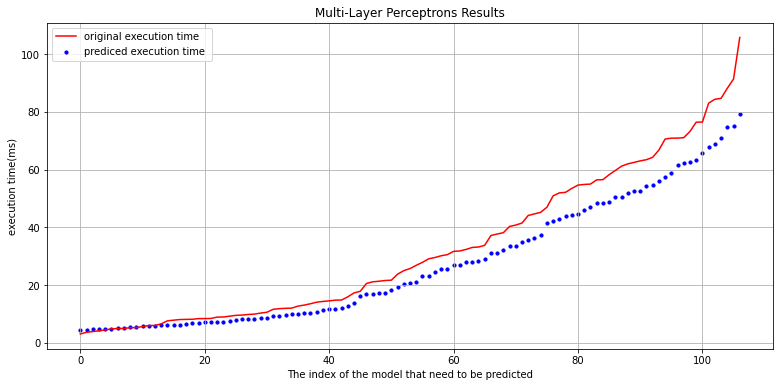

In [20]:
from time import time
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from itertools import product
from pandas.core.frame import DataFrame
import numpy as np
import csv
import matplotlib.pyplot as plt


# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']



train = pd.read_csv("training_data.csv")
x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCV.csv")
x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']



scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)
MAPE_default=10000
MAPE_better=MAPE_default
range_neuron_first_layer =range(4,12,1)
start = time()
for num_neuron_first_layer in range_neuron_first_layer:
    
    model = tf.keras.Sequential([tf.keras.layers.Dense(num_neuron_first_layer, activation = 'sigmoid', input_shape = x_train.shape[1:]),
                                 
                                tf.keras.layers.Dense(1)])

    model.compile(loss = tf.losses.mean_squared_error,
                 optimizer = 'sgd')
    history = model.fit(x_train, y_train, epochs=200)

    y_valid_current = model.predict(x_valid)

    y_valid  = np.array(y_valid).reshape(-1,1)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    if ( MAPE < MAPE_better ):
        better_num_neuron_first_layer = num_neuron_first_layer
        MAPE_better = MAPE
stop = time()
tunning_time = stop-start        
start = time()
model = tf.keras.Sequential([tf.keras.layers.Dense(num_neuron_first_layer, activation = 'sigmoid', input_shape = x_train.shape[1:]),
                                 
                                tf.keras.layers.Dense(1)])
model.compile(loss = tf.losses.mean_squared_error,
                 optimizer = 'sgd')
history = model.fit(x_train, y_train, epochs=200)
stop = time()
training_time = stop-start 

y_pred = model.predict(x_valid)

y_test  = np.array(y_valid).reshape(-1,1)
per_err = (y_test - y_pred) / y_test
per_err = abs(per_err)*100
MAPE = sum(per_err)/len(per_err)

MAPE = DataFrame(MAPE)  
# Print the MAPE value 
print(f"""MAPE of MLP  :" , {round(MAPE, 2)}
lowest MAPE in training process:" ,{MAPE_better}
the number of neurons of fist layer :{ better_num_neuron_first_layer },
Tunning time : {tunning_time}s,
Training time : {training_time}s
     """)

y_test_sort=np.sort(y_test,axis=0)
y_pred_sort=np.sort(y_pred,axis=0)
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test_sort,"r",label="Original Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred_sort,s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("MLP: Predicted vs. Measured Execution Time of NCV")
plt.show()

# The numerber of hidden layer: 2

2022-06-18 09:23:47.533599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu:/usr/local/lib:/opt/vitis_ai/conda/envs/vitis-ai-tensorflow/lib
2022-06-18 09:23:47.533613: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-18 09:23:48.492833: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/xilinx/xrt/lib:/usr/lib:/usr/lib/x86_64-linux-gnu:/usr/local/lib:/opt/vitis_ai/conda/envs/vitis-ai-tensorflow/lib
2022-06-18 09:23:48.492863: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR

Epoch 1/200
14/14 [==============================] - 0s 651us/step - loss: 826.0125
Epoch 2/200
14/14 [==============================] - 0s 535us/step - loss: 339.7314
Epoch 3/200
14/14 [==============================] - 0s 514us/step - loss: 167.9946
Epoch 4/200
14/14 [==============================] - 0s 546us/step - loss: 152.0789
Epoch 5/200
14/14 [==============================] - 0s 505us/step - loss: 101.0587
Epoch 6/200
14/14 [==============================] - 0s 498us/step - loss: 82.0245
Epoch 7/200
14/14 [==============================] - 0s 534us/step - loss: 70.0287
Epoch 8/200
14/14 [==============================] - 0s 541us/step - loss: 63.3801
Epoch 9/200
14/14 [==============================] - 0s 567us/step - loss: 59.4017
Epoch 10/200
14/14 [==============================] - 0s 534us/step - loss: 56.7375
Epoch 11/200
14/14 [==============================] - 0s 541us/step - loss: 53.4328
Epoch 12/200
14/14 [==============================] - 0s 581us/step - loss: 51.1

14/14 [==============================] - 0s 670us/step - loss: 29.8600
Epoch 195/200
14/14 [==============================] - 0s 685us/step - loss: 28.8927
Epoch 196/200
14/14 [==============================] - 0s 715us/step - loss: 29.8011
Epoch 197/200
14/14 [==============================] - 0s 722us/step - loss: 29.9039
Epoch 198/200
14/14 [==============================] - 0s 708us/step - loss: 30.2724
Epoch 199/200
14/14 [==============================] - 0s 698us/step - loss: 30.6968
Epoch 200/200
14/14 [==============================] - 0s 731us/step - loss: 29.6795
Epoch 1/200
14/14 [==============================] - 0s 653us/step - loss: 734.8538
Epoch 2/200
14/14 [==============================] - 0s 565us/step - loss: 252.7547
Epoch 3/200
14/14 [==============================] - 0s 582us/step - loss: 136.5249
Epoch 4/200
14/14 [==============================] - 0s 531us/step - loss: 100.3398
Epoch 5/200
14/14 [==============================] - 0s 525us/step - loss: 81.5116


14/14 [==============================] - 0s 760us/step - loss: 32.5765
Epoch 188/200
14/14 [==============================] - 0s 696us/step - loss: 32.1216
Epoch 189/200
14/14 [==============================] - 0s 710us/step - loss: 32.4318
Epoch 190/200
14/14 [==============================] - 0s 668us/step - loss: 31.0494
Epoch 191/200
14/14 [==============================] - 0s 660us/step - loss: 33.7808
Epoch 192/200
14/14 [==============================] - 0s 734us/step - loss: 32.6446
Epoch 193/200
14/14 [==============================] - 0s 723us/step - loss: 31.9294
Epoch 194/200
14/14 [==============================] - 0s 702us/step - loss: 31.0739
Epoch 195/200
14/14 [==============================] - 0s 695us/step - loss: 32.3342
Epoch 196/200
14/14 [==============================] - 0s 721us/step - loss: 32.0977
Epoch 197/200
14/14 [==============================] - 0s 747us/step - loss: 31.6733
Epoch 198/200
14/14 [==============================] - 0s 692us/step - loss: 32

14/14 [==============================] - 0s 635us/step - loss: 31.1781
Epoch 181/200
14/14 [==============================] - 0s 636us/step - loss: 30.3881
Epoch 182/200
14/14 [==============================] - 0s 670us/step - loss: 30.7821
Epoch 183/200
14/14 [==============================] - 0s 635us/step - loss: 31.2311
Epoch 184/200
14/14 [==============================] - 0s 644us/step - loss: 34.0780
Epoch 185/200
14/14 [==============================] - 0s 652us/step - loss: 30.2385
Epoch 186/200
14/14 [==============================] - 0s 673us/step - loss: 29.9638
Epoch 187/200
14/14 [==============================] - 0s 648us/step - loss: 31.9353
Epoch 188/200
14/14 [==============================] - 0s 635us/step - loss: 32.0937
Epoch 189/200
14/14 [==============================] - 0s 607us/step - loss: 31.5180
Epoch 190/200
14/14 [==============================] - 0s 694us/step - loss: 29.7876
Epoch 191/200
14/14 [==============================] - 0s 683us/step - loss: 32

14/14 [==============================] - 0s 716us/step - loss: 33.3930
Epoch 174/200
14/14 [==============================] - 0s 679us/step - loss: 30.3595
Epoch 175/200
14/14 [==============================] - 0s 742us/step - loss: 31.5983
Epoch 176/200
14/14 [==============================] - 0s 715us/step - loss: 31.6373
Epoch 177/200
14/14 [==============================] - 0s 692us/step - loss: 29.8267
Epoch 178/200
14/14 [==============================] - 0s 692us/step - loss: 29.3290
Epoch 179/200
14/14 [==============================] - 0s 774us/step - loss: 30.8223
Epoch 180/200
14/14 [==============================] - 0s 718us/step - loss: 33.6880
Epoch 181/200
14/14 [==============================] - 0s 745us/step - loss: 40.3413
Epoch 182/200
14/14 [==============================] - 0s 685us/step - loss: 36.9546
Epoch 183/200
14/14 [==============================] - 0s 738us/step - loss: 37.7238
Epoch 184/200
14/14 [==============================] - 0s 707us/step - loss: 37

14/14 [==============================] - 0s 751us/step - loss: 30.0160
Epoch 167/200
14/14 [==============================] - 0s 762us/step - loss: 31.3272
Epoch 168/200
14/14 [==============================] - 0s 794us/step - loss: 30.5162
Epoch 169/200
14/14 [==============================] - 0s 826us/step - loss: 32.4877
Epoch 170/200
14/14 [==============================] - 0s 804us/step - loss: 34.8973
Epoch 171/200
14/14 [==============================] - 0s 752us/step - loss: 32.7725
Epoch 172/200
14/14 [==============================] - ETA: 0s - loss: 57.94 - 0s 802us/step - loss: 32.9124
Epoch 173/200
14/14 [==============================] - 0s 795us/step - loss: 31.1178
Epoch 174/200
14/14 [==============================] - 0s 846us/step - loss: 31.3754
Epoch 175/200
14/14 [==============================] - 0s 846us/step - loss: 30.4341
Epoch 176/200
14/14 [==============================] - 0s 816us/step - loss: 30.8812
Epoch 177/200
14/14 [==============================] - 

14/14 [==============================] - 0s 586us/step - loss: 32.3392
Epoch 64/200
14/14 [==============================] - 0s 632us/step - loss: 30.4336
Epoch 65/200
14/14 [==============================] - 0s 624us/step - loss: 32.5914
Epoch 66/200
14/14 [==============================] - 0s 615us/step - loss: 30.0954
Epoch 67/200
14/14 [==============================] - 0s 631us/step - loss: 31.9022
Epoch 68/200
14/14 [==============================] - 0s 581us/step - loss: 29.9114
Epoch 69/200
14/14 [==============================] - 0s 616us/step - loss: 32.5981
Epoch 70/200
14/14 [==============================] - 0s 607us/step - loss: 30.1952
Epoch 71/200
14/14 [==============================] - 0s 627us/step - loss: 31.0024
Epoch 72/200
14/14 [==============================] - 0s 628us/step - loss: 29.9108
Epoch 73/200
14/14 [==============================] - 0s 601us/step - loss: 30.4777
Epoch 74/200
14/14 [==============================] - 0s 604us/step - loss: 32.4458
Epoch

Epoch 160/200
14/14 [==============================] - 0s 633us/step - loss: 31.2195
Epoch 161/200
14/14 [==============================] - 0s 663us/step - loss: 31.1004
Epoch 162/200
14/14 [==============================] - 0s 703us/step - loss: 30.5164
Epoch 163/200
14/14 [==============================] - 0s 734us/step - loss: 32.8609
Epoch 164/200
14/14 [==============================] - 0s 717us/step - loss: 33.0839
Epoch 165/200
14/14 [==============================] - 0s 749us/step - loss: 30.6965
Epoch 166/200
14/14 [==============================] - 0s 716us/step - loss: 30.8489
Epoch 167/200
14/14 [==============================] - 0s 699us/step - loss: 30.9605
Epoch 168/200
14/14 [==============================] - 0s 770us/step - loss: 31.5472
Epoch 169/200
14/14 [==============================] - 0s 762us/step - loss: 29.4972
Epoch 170/200
14/14 [==============================] - 0s 729us/step - loss: 31.1057
Epoch 171/200
14/14 [==============================] - 0s 759us/s

14/14 [==============================] - 0s 741us/step - loss: 36.8944
Epoch 58/200
14/14 [==============================] - 0s 726us/step - loss: 35.5920
Epoch 59/200
14/14 [==============================] - 0s 749us/step - loss: 35.9589
Epoch 60/200
14/14 [==============================] - 0s 661us/step - loss: 35.7261
Epoch 61/200
14/14 [==============================] - 0s 717us/step - loss: 35.5036
Epoch 62/200
14/14 [==============================] - 0s 755us/step - loss: 36.5338
Epoch 63/200
14/14 [==============================] - 0s 738us/step - loss: 34.7205
Epoch 64/200
14/14 [==============================] - 0s 676us/step - loss: 37.6194
Epoch 65/200
14/14 [==============================] - 0s 720us/step - loss: 34.7881
Epoch 66/200
14/14 [==============================] - 0s 729us/step - loss: 33.9722
Epoch 67/200
14/14 [==============================] - 0s 729us/step - loss: 37.3646
Epoch 68/200
14/14 [==============================] - 0s 719us/step - loss: 37.7913
Epoch

14/14 [==============================] - 0s 811us/step - loss: 42.6078
Epoch 51/200
14/14 [==============================] - 0s 804us/step - loss: 37.3597
Epoch 52/200
14/14 [==============================] - 0s 822us/step - loss: 35.9286
Epoch 53/200
14/14 [==============================] - 0s 793us/step - loss: 34.8495
Epoch 54/200
14/14 [==============================] - 0s 789us/step - loss: 35.4802
Epoch 55/200
14/14 [==============================] - 0s 779us/step - loss: 34.0942
Epoch 56/200
14/14 [==============================] - 0s 822us/step - loss: 33.8247
Epoch 57/200
14/14 [==============================] - 0s 831us/step - loss: 33.7092
Epoch 58/200
14/14 [==============================] - 0s 807us/step - loss: 34.0985
Epoch 59/200
14/14 [==============================] - 0s 845us/step - loss: 33.4510
Epoch 60/200
14/14 [==============================] - 0s 803us/step - loss: 32.4920
Epoch 61/200
14/14 [==============================] - 0s 840us/step - loss: 35.6616
Epoch

14/14 [==============================] - 0s 780us/step - loss: 31.7222
Epoch 148/200
14/14 [==============================] - 0s 833us/step - loss: 35.9016
Epoch 149/200
14/14 [==============================] - 0s 753us/step - loss: 31.6106
Epoch 150/200
14/14 [==============================] - 0s 806us/step - loss: 33.3040
Epoch 151/200
14/14 [==============================] - 0s 801us/step - loss: 32.4952
Epoch 152/200
14/14 [==============================] - 0s 819us/step - loss: 33.7929
Epoch 153/200
14/14 [==============================] - 0s 800us/step - loss: 33.3913
Epoch 154/200
14/14 [==============================] - 0s 782us/step - loss: 32.0467
Epoch 155/200
14/14 [==============================] - 0s 821us/step - loss: 32.6336
Epoch 156/200
14/14 [==============================] - 0s 807us/step - loss: 32.2235
Epoch 157/200
14/14 [==============================] - 0s 795us/step - loss: 33.8980
Epoch 158/200
14/14 [==============================] - 0s 782us/step - loss: 33

14/14 [==============================] - 0s 805us/step - loss: 32.4951
Epoch 45/200
14/14 [==============================] - 0s 805us/step - loss: 32.3324
Epoch 46/200
14/14 [==============================] - 0s 818us/step - loss: 36.1274
Epoch 47/200
14/14 [==============================] - 0s 765us/step - loss: 35.8997
Epoch 48/200
14/14 [==============================] - 0s 839us/step - loss: 36.4418
Epoch 49/200
14/14 [==============================] - 0s 785us/step - loss: 31.2113
Epoch 50/200
14/14 [==============================] - 0s 814us/step - loss: 37.5741
Epoch 51/200
14/14 [==============================] - 0s 781us/step - loss: 35.6838
Epoch 52/200
14/14 [==============================] - 0s 831us/step - loss: 33.7308
Epoch 53/200
14/14 [==============================] - 0s 894us/step - loss: 32.9025
Epoch 54/200
14/14 [==============================] - 0s 849us/step - loss: 31.0068
Epoch 55/200
14/14 [==============================] - 0s 781us/step - loss: 33.3010
Epoch

14/14 [==============================] - 0s 595us/step - loss: 33.5465
Epoch 39/200
14/14 [==============================] - 0s 636us/step - loss: 32.3828
Epoch 40/200
14/14 [==============================] - 0s 574us/step - loss: 35.5490
Epoch 41/200
14/14 [==============================] - 0s 601us/step - loss: 31.7170
Epoch 42/200
14/14 [==============================] - 0s 585us/step - loss: 31.8018
Epoch 43/200
14/14 [==============================] - 0s 620us/step - loss: 35.4182
Epoch 44/200
14/14 [==============================] - 0s 606us/step - loss: 31.4641
Epoch 45/200
14/14 [==============================] - 0s 673us/step - loss: 33.8905
Epoch 46/200
14/14 [==============================] - 0s 627us/step - loss: 34.2080
Epoch 47/200
14/14 [==============================] - 0s 604us/step - loss: 37.0967
Epoch 48/200
14/14 [==============================] - 0s 602us/step - loss: 31.6645
Epoch 49/200
14/14 [==============================] - 0s 612us/step - loss: 33.8168
Epoch

14/14 [==============================] - 0s 727us/step - loss: 35.0649
Epoch 32/200
14/14 [==============================] - 0s 742us/step - loss: 35.9489
Epoch 33/200
14/14 [==============================] - 0s 721us/step - loss: 32.3695
Epoch 34/200
14/14 [==============================] - 0s 759us/step - loss: 36.9891
Epoch 35/200
14/14 [==============================] - 0s 782us/step - loss: 33.4017
Epoch 36/200
14/14 [==============================] - 0s 784us/step - loss: 33.8126
Epoch 37/200
14/14 [==============================] - 0s 720us/step - loss: 30.8819
Epoch 38/200
14/14 [==============================] - 0s 777us/step - loss: 32.1304
Epoch 39/200
14/14 [==============================] - 0s 742us/step - loss: 37.5739
Epoch 40/200
14/14 [==============================] - 0s 721us/step - loss: 35.5457
Epoch 41/200
14/14 [==============================] - 0s 707us/step - loss: 38.2713
Epoch 42/200
14/14 [==============================] - 0s 745us/step - loss: 35.6168
Epoch

14/14 [==============================] - 0s 561us/step - loss: 41.4428
Epoch 25/200
14/14 [==============================] - 0s 549us/step - loss: 34.4743
Epoch 26/200
14/14 [==============================] - 0s 540us/step - loss: 34.2022
Epoch 27/200
14/14 [==============================] - 0s 557us/step - loss: 31.2630
Epoch 28/200
14/14 [==============================] - 0s 554us/step - loss: 36.9910
Epoch 29/200
14/14 [==============================] - 0s 570us/step - loss: 35.6573
Epoch 30/200
14/14 [==============================] - 0s 547us/step - loss: 31.2187
Epoch 31/200
14/14 [==============================] - 0s 546us/step - loss: 32.5838
Epoch 32/200
14/14 [==============================] - 0s 558us/step - loss: 33.8178
Epoch 33/200
14/14 [==============================] - 0s 545us/step - loss: 35.6865
Epoch 34/200
14/14 [==============================] - 0s 524us/step - loss: 31.3300
Epoch 35/200
14/14 [==============================] - 0s 530us/step - loss: 31.0168
Epoch

14/14 [==============================] - 0s 676us/step - loss: 30.3789
Epoch 122/200
14/14 [==============================] - 0s 759us/step - loss: 28.8335
Epoch 123/200
14/14 [==============================] - 0s 762us/step - loss: 29.4250
Epoch 124/200
14/14 [==============================] - 0s 739us/step - loss: 29.9374
Epoch 125/200
14/14 [==============================] - 0s 734us/step - loss: 30.5826
Epoch 126/200
14/14 [==============================] - 0s 743us/step - loss: 31.0904
Epoch 127/200
14/14 [==============================] - 0s 760us/step - loss: 30.4609
Epoch 128/200
14/14 [==============================] - 0s 714us/step - loss: 30.9662
Epoch 129/200
14/14 [==============================] - 0s 714us/step - loss: 30.6374
Epoch 130/200
14/14 [==============================] - 0s 763us/step - loss: 30.8966
Epoch 131/200
14/14 [==============================] - 0s 720us/step - loss: 30.6613
Epoch 132/200
14/14 [==============================] - 0s 690us/step - loss: 29

14/14 [==============================] - 0s 700us/step - loss: 35.1059
Epoch 115/200
14/14 [==============================] - 0s 750us/step - loss: 35.1967
Epoch 116/200
14/14 [==============================] - 0s 742us/step - loss: 33.3589
Epoch 117/200
14/14 [==============================] - 0s 743us/step - loss: 35.3807
Epoch 118/200
14/14 [==============================] - 0s 707us/step - loss: 36.4676
Epoch 119/200
14/14 [==============================] - 0s 734us/step - loss: 42.0354
Epoch 120/200
14/14 [==============================] - 0s 700us/step - loss: 36.3409
Epoch 121/200
14/14 [==============================] - 0s 708us/step - loss: 34.7825
Epoch 122/200
14/14 [==============================] - 0s 744us/step - loss: 36.7153
Epoch 123/200
14/14 [==============================] - 0s 737us/step - loss: 34.4299
Epoch 124/200
14/14 [==============================] - 0s 708us/step - loss: 36.5562
Epoch 125/200
14/14 [==============================] - 0s 707us/step - loss: 35

14/14 [==============================] - 0s 619us/step - loss: 31.5769
Epoch 108/200
14/14 [==============================] - 0s 605us/step - loss: 32.1352
Epoch 109/200
14/14 [==============================] - 0s 588us/step - loss: 33.4686
Epoch 110/200
14/14 [==============================] - 0s 597us/step - loss: 32.9053
Epoch 111/200
14/14 [==============================] - 0s 651us/step - loss: 32.5068
Epoch 112/200
14/14 [==============================] - 0s 624us/step - loss: 32.6354
Epoch 113/200
14/14 [==============================] - 0s 589us/step - loss: 32.9668
Epoch 114/200
14/14 [==============================] - 0s 571us/step - loss: 37.5573
Epoch 115/200
14/14 [==============================] - 0s 601us/step - loss: 39.8013
Epoch 116/200
14/14 [==============================] - 0s 594us/step - loss: 33.5980
Epoch 117/200
14/14 [==============================] - 0s 616us/step - loss: 30.8196
Epoch 118/200
14/14 [==============================] - 0s 576us/step - loss: 31

14/14 [==============================] - 0s 625us/step - loss: 32.2794
Epoch 101/200
14/14 [==============================] - 0s 633us/step - loss: 32.2475
Epoch 102/200
14/14 [==============================] - 0s 670us/step - loss: 33.1403
Epoch 103/200
14/14 [==============================] - 0s 607us/step - loss: 34.2397
Epoch 104/200
14/14 [==============================] - 0s 662us/step - loss: 34.1431
Epoch 105/200
14/14 [==============================] - 0s 646us/step - loss: 33.3746
Epoch 106/200
14/14 [==============================] - 0s 657us/step - loss: 31.2725
Epoch 107/200
14/14 [==============================] - 0s 665us/step - loss: 31.4036
Epoch 108/200
14/14 [==============================] - 0s 672us/step - loss: 32.7820
Epoch 109/200
14/14 [==============================] - 0s 630us/step - loss: 33.1292
Epoch 110/200
14/14 [==============================] - 0s 700us/step - loss: 30.6316
Epoch 111/200
14/14 [==============================] - 0s 632us/step - loss: 34

14/14 [==============================] - 0s 685us/step - loss: 32.2477
Epoch 94/200
14/14 [==============================] - 0s 637us/step - loss: 34.5676
Epoch 95/200
14/14 [==============================] - 0s 669us/step - loss: 32.9478
Epoch 96/200
14/14 [==============================] - 0s 639us/step - loss: 33.6003
Epoch 97/200
14/14 [==============================] - 0s 638us/step - loss: 32.9444
Epoch 98/200
14/14 [==============================] - 0s 665us/step - loss: 36.0562
Epoch 99/200
14/14 [==============================] - 0s 677us/step - loss: 35.8848
Epoch 100/200
14/14 [==============================] - 0s 637us/step - loss: 32.1318
Epoch 101/200
14/14 [==============================] - 0s 695us/step - loss: 32.6753
Epoch 102/200
14/14 [==============================] - 0s 613us/step - loss: 33.9194
Epoch 103/200
14/14 [==============================] - 0s 666us/step - loss: 35.7399
Epoch 104/200
14/14 [==============================] - 0s 676us/step - loss: 31.9205


14/14 [==============================] - 0s 697us/step - loss: 30.3915
Epoch 87/200
14/14 [==============================] - 0s 748us/step - loss: 31.4110
Epoch 88/200
14/14 [==============================] - 0s 740us/step - loss: 31.2829
Epoch 89/200
14/14 [==============================] - 0s 735us/step - loss: 30.8143
Epoch 90/200
14/14 [==============================] - 0s 749us/step - loss: 33.2721
Epoch 91/200
14/14 [==============================] - 0s 698us/step - loss: 32.3028
Epoch 92/200
14/14 [==============================] - 0s 745us/step - loss: 30.5161
Epoch 93/200
14/14 [==============================] - 0s 718us/step - loss: 30.9593
Epoch 94/200
14/14 [==============================] - 0s 743us/step - loss: 31.2401
Epoch 95/200
14/14 [==============================] - 0s 752us/step - loss: 30.3363
Epoch 96/200
14/14 [==============================] - 0s 744us/step - loss: 30.8155
Epoch 97/200
14/14 [==============================] - 0s 753us/step - loss: 30.5139
Epoch

14/14 [==============================] - 0s 789us/step - loss: 30.9549
Epoch 80/200
14/14 [==============================] - 0s 881us/step - loss: 32.8831
Epoch 81/200
14/14 [==============================] - 0s 822us/step - loss: 32.9844
Epoch 82/200
14/14 [==============================] - 0s 856us/step - loss: 36.6100
Epoch 83/200
14/14 [==============================] - 0s 774us/step - loss: 32.9719
Epoch 84/200
14/14 [==============================] - 0s 840us/step - loss: 31.0871
Epoch 85/200
14/14 [==============================] - 0s 787us/step - loss: 31.0819
Epoch 86/200
14/14 [==============================] - 0s 805us/step - loss: 32.1283
Epoch 87/200
14/14 [==============================] - 0s 772us/step - loss: 31.4227
Epoch 88/200
14/14 [==============================] - 0s 808us/step - loss: 31.3166
Epoch 89/200
14/14 [==============================] - 0s 802us/step - loss: 30.7799
Epoch 90/200
14/14 [==============================] - 0s 780us/step - loss: 31.6149
Epoch

14/14 [==============================] - 0s 693us/step - loss: 35.3869
Epoch 73/200
14/14 [==============================] - 0s 646us/step - loss: 37.6537
Epoch 74/200
14/14 [==============================] - 0s 631us/step - loss: 38.7473
Epoch 75/200
14/14 [==============================] - 0s 666us/step - loss: 37.5557
Epoch 76/200
14/14 [==============================] - 0s 700us/step - loss: 33.4054
Epoch 77/200
14/14 [==============================] - 0s 632us/step - loss: 33.8221
Epoch 78/200
14/14 [==============================] - 0s 708us/step - loss: 32.4966
Epoch 79/200
14/14 [==============================] - 0s 644us/step - loss: 34.2076
Epoch 80/200
14/14 [==============================] - 0s 661us/step - loss: 34.5296
Epoch 81/200
14/14 [==============================] - 0s 681us/step - loss: 33.6606
Epoch 82/200
14/14 [==============================] - 0s 670us/step - loss: 33.4195
Epoch 83/200
14/14 [==============================] - 0s 651us/step - loss: 33.2517
Epoch

14/14 [==============================] - 0s 796us/step - loss: 33.1642
Epoch 66/200
14/14 [==============================] - 0s 811us/step - loss: 36.2571
Epoch 67/200
14/14 [==============================] - 0s 759us/step - loss: 30.6671
Epoch 68/200
14/14 [==============================] - 0s 792us/step - loss: 33.5987
Epoch 69/200
14/14 [==============================] - 0s 819us/step - loss: 30.7680
Epoch 70/200
14/14 [==============================] - 0s 813us/step - loss: 33.1498
Epoch 71/200
14/14 [==============================] - 0s 770us/step - loss: 33.3946
Epoch 72/200
14/14 [==============================] - 0s 792us/step - loss: 34.1995
Epoch 73/200
14/14 [==============================] - 0s 819us/step - loss: 33.0615
Epoch 74/200
14/14 [==============================] - 0s 831us/step - loss: 30.8689
Epoch 75/200
14/14 [==============================] - 0s 817us/step - loss: 32.9573
Epoch 76/200
14/14 [==============================] - 0s 826us/step - loss: 36.3011
Epoch

Epoch 162/200
14/14 [==============================] - 0s 658us/step - loss: 32.8742
Epoch 163/200
14/14 [==============================] - 0s 680us/step - loss: 37.0533
Epoch 164/200
14/14 [==============================] - 0s 640us/step - loss: 31.3172
Epoch 165/200
14/14 [==============================] - 0s 663us/step - loss: 31.5405
Epoch 166/200
14/14 [==============================] - 0s 679us/step - loss: 32.5740
Epoch 167/200
14/14 [==============================] - 0s 649us/step - loss: 31.8817
Epoch 168/200
14/14 [==============================] - 0s 664us/step - loss: 34.9239
Epoch 169/200
14/14 [==============================] - 0s 685us/step - loss: 32.1860
Epoch 170/200
14/14 [==============================] - 0s 651us/step - loss: 33.2866
Epoch 171/200
14/14 [==============================] - 0s 681us/step - loss: 34.3393
Epoch 172/200
14/14 [==============================] - 0s 684us/step - loss: 32.7668
Epoch 173/200
14/14 [==============================] - 0s 660us/s

14/14 [==============================] - 0s 897us/step - loss: 33.8235
Epoch 60/200
14/14 [==============================] - 0s 915us/step - loss: 34.5347
Epoch 61/200
14/14 [==============================] - 0s 900us/step - loss: 35.0283
Epoch 62/200
14/14 [==============================] - 0s 887us/step - loss: 32.2083
Epoch 63/200
14/14 [==============================] - 0s 944us/step - loss: 33.2685
Epoch 64/200
14/14 [==============================] - 0s 927us/step - loss: 32.4645
Epoch 65/200
14/14 [==============================] - 0s 954us/step - loss: 32.3385
Epoch 66/200
14/14 [==============================] - 0s 886us/step - loss: 31.2819
Epoch 67/200
14/14 [==============================] - 0s 949us/step - loss: 32.8262
Epoch 68/200
14/14 [==============================] - 0s 1ms/step - loss: 32.9958
Epoch 69/200
14/14 [==============================] - 0s 864us/step - loss: 30.8973
Epoch 70/200
14/14 [==============================] - 0s 934us/step - loss: 31.3823
Epoch 7

14/14 [==============================] - 0s 880us/step - loss: 31.2264
Epoch 157/200
14/14 [==============================] - 0s 922us/step - loss: 32.0586
Epoch 158/200
14/14 [==============================] - 0s 870us/step - loss: 32.0812
Epoch 159/200
14/14 [==============================] - 0s 901us/step - loss: 30.8286
Epoch 160/200
14/14 [==============================] - 0s 901us/step - loss: 30.3930
Epoch 161/200
14/14 [==============================] - 0s 922us/step - loss: 30.7743
Epoch 162/200
14/14 [==============================] - 0s 877us/step - loss: 31.3546
Epoch 163/200
14/14 [==============================] - 0s 899us/step - loss: 32.1011
Epoch 164/200
14/14 [==============================] - 0s 909us/step - loss: 31.3650
Epoch 165/200
14/14 [==============================] - 0s 927us/step - loss: 29.8786
Epoch 166/200
14/14 [==============================] - 0s 943us/step - loss: 29.8605
Epoch 167/200
14/14 [==============================] - 0s 909us/step - loss: 31

14/14 [==============================] - 0s 797us/step - loss: 29.8653
Epoch 151/200
14/14 [==============================] - 0s 806us/step - loss: 32.7654
Epoch 152/200
14/14 [==============================] - 0s 826us/step - loss: 33.4787
Epoch 153/200
14/14 [==============================] - 0s 820us/step - loss: 30.1425
Epoch 154/200
14/14 [==============================] - 0s 793us/step - loss: 30.8494
Epoch 155/200
14/14 [==============================] - 0s 877us/step - loss: 29.7149
Epoch 156/200
14/14 [==============================] - 0s 809us/step - loss: 30.8538
Epoch 157/200
14/14 [==============================] - 0s 791us/step - loss: 30.2245
Epoch 158/200
14/14 [==============================] - 0s 771us/step - loss: 31.4288
Epoch 159/200
14/14 [==============================] - 0s 793us/step - loss: 31.6600
Epoch 160/200
14/14 [==============================] - 0s 791us/step - loss: 29.9671
Epoch 161/200
14/14 [==============================] - 0s 797us/step - loss: 30

14/14 [==============================] - 0s 678us/step - loss: 29.7579
Epoch 145/200
14/14 [==============================] - 0s 707us/step - loss: 29.4634
Epoch 146/200
14/14 [==============================] - 0s 683us/step - loss: 30.9490
Epoch 147/200
14/14 [==============================] - 0s 698us/step - loss: 30.5851
Epoch 148/200
14/14 [==============================] - 0s 659us/step - loss: 31.6560
Epoch 149/200
14/14 [==============================] - 0s 681us/step - loss: 30.2030
Epoch 150/200
14/14 [==============================] - 0s 628us/step - loss: 31.2198
Epoch 151/200
14/14 [==============================] - 0s 699us/step - loss: 31.5274
Epoch 152/200
14/14 [==============================] - 0s 677us/step - loss: 33.6982
Epoch 153/200
14/14 [==============================] - 0s 689us/step - loss: 29.2163
Epoch 154/200
14/14 [==============================] - 0s 690us/step - loss: 29.2667
Epoch 155/200
14/14 [==============================] - 0s 630us/step - loss: 30

14/14 [==============================] - 0s 729us/step - loss: 34.2280
Epoch 42/200
14/14 [==============================] - 0s 730us/step - loss: 34.3395
Epoch 43/200
14/14 [==============================] - 0s 764us/step - loss: 32.1720
Epoch 44/200
14/14 [==============================] - 0s 717us/step - loss: 32.5543
Epoch 45/200
14/14 [==============================] - 0s 709us/step - loss: 31.5415
Epoch 46/200
14/14 [==============================] - 0s 688us/step - loss: 32.0864
Epoch 47/200
14/14 [==============================] - 0s 737us/step - loss: 32.9204
Epoch 48/200
14/14 [==============================] - 0s 731us/step - loss: 31.5066
Epoch 49/200
14/14 [==============================] - 0s 729us/step - loss: 30.1423
Epoch 50/200
14/14 [==============================] - 0s 717us/step - loss: 31.8313
Epoch 51/200
14/14 [==============================] - 0s 750us/step - loss: 32.1271
Epoch 52/200
14/14 [==============================] - 0s 725us/step - loss: 31.6777
Epoch

14/14 [==============================] - 0s 697us/step - loss: 38.1501
Epoch 36/200
14/14 [==============================] - 0s 719us/step - loss: 34.7020
Epoch 37/200
14/14 [==============================] - 0s 739us/step - loss: 33.1244
Epoch 38/200
14/14 [==============================] - 0s 716us/step - loss: 33.7592
Epoch 39/200
14/14 [==============================] - 0s 743us/step - loss: 37.4385
Epoch 40/200
14/14 [==============================] - 0s 685us/step - loss: 37.5350
Epoch 41/200
14/14 [==============================] - 0s 741us/step - loss: 34.9629
Epoch 42/200
14/14 [==============================] - 0s 728us/step - loss: 37.3191
Epoch 43/200
14/14 [==============================] - 0s 698us/step - loss: 33.7592
Epoch 44/200
14/14 [==============================] - 0s 724us/step - loss: 35.1415
Epoch 45/200
14/14 [==============================] - 0s 707us/step - loss: 34.4707
Epoch 46/200
14/14 [==============================] - 0s 733us/step - loss: 36.2235
Epoch

Epoch 29/200
14/14 [==============================] - 0s 703us/step - loss: 36.9989
Epoch 30/200
14/14 [==============================] - 0s 704us/step - loss: 36.7462
Epoch 31/200
14/14 [==============================] - 0s 652us/step - loss: 40.8259
Epoch 32/200
14/14 [==============================] - 0s 675us/step - loss: 43.2696
Epoch 33/200
14/14 [==============================] - 0s 693us/step - loss: 33.6748
Epoch 34/200
14/14 [==============================] - 0s 688us/step - loss: 36.9813
Epoch 35/200
14/14 [==============================] - 0s 678us/step - loss: 35.1363
Epoch 36/200
14/14 [==============================] - 0s 667us/step - loss: 38.9635
Epoch 37/200
14/14 [==============================] - 0s 666us/step - loss: 49.1899
Epoch 38/200
14/14 [==============================] - 0s 660us/step - loss: 35.5401
Epoch 39/200
14/14 [==============================] - 0s 647us/step - loss: 32.9374
Epoch 40/200
14/14 [==============================] - 0s 641us/step - loss: 

14/14 [==============================] - 0s 582us/step - loss: 38.7948
Epoch 23/200
14/14 [==============================] - 0s 556us/step - loss: 35.3994
Epoch 24/200
14/14 [==============================] - 0s 530us/step - loss: 36.7636
Epoch 25/200
14/14 [==============================] - 0s 562us/step - loss: 33.2804
Epoch 26/200
14/14 [==============================] - 0s 556us/step - loss: 34.9243
Epoch 27/200
14/14 [==============================] - 0s 551us/step - loss: 34.7808
Epoch 28/200
14/14 [==============================] - 0s 563us/step - loss: 42.7569
Epoch 29/200
14/14 [==============================] - 0s 552us/step - loss: 35.0864
Epoch 30/200
14/14 [==============================] - 0s 543us/step - loss: 33.6517
Epoch 31/200
14/14 [==============================] - 0s 539us/step - loss: 34.4028
Epoch 32/200
14/14 [==============================] - 0s 564us/step - loss: 36.9371
Epoch 33/200
14/14 [==============================] - 0s 550us/step - loss: 36.5917
Epoch

14/14 [==============================] - 0s 542us/step - loss: 37.9798
Epoch 16/200
14/14 [==============================] - 0s 601us/step - loss: 36.1026
Epoch 17/200
14/14 [==============================] - 0s 584us/step - loss: 43.0243
Epoch 18/200
14/14 [==============================] - 0s 609us/step - loss: 38.2971
Epoch 19/200
14/14 [==============================] - 0s 582us/step - loss: 44.1862
Epoch 20/200
14/14 [==============================] - 0s 607us/step - loss: 43.0271
Epoch 21/200
14/14 [==============================] - 0s 612us/step - loss: 34.8361
Epoch 22/200
14/14 [==============================] - 0s 596us/step - loss: 35.8541
Epoch 23/200
14/14 [==============================] - 0s 607us/step - loss: 37.7836
Epoch 24/200
14/14 [==============================] - 0s 608us/step - loss: 38.3110
Epoch 25/200
14/14 [==============================] - 0s 620us/step - loss: 38.8576
Epoch 26/200
14/14 [==============================] - 0s 629us/step - loss: 40.4419
Epoch

14/14 [==============================] - 0s 563us/step - loss: 52.4804
Epoch 9/200
14/14 [==============================] - 0s 572us/step - loss: 58.9130
Epoch 10/200
14/14 [==============================] - 0s 516us/step - loss: 63.6836
Epoch 11/200
14/14 [==============================] - 0s 546us/step - loss: 53.6124
Epoch 12/200
14/14 [==============================] - 0s 558us/step - loss: 41.3050
Epoch 13/200
14/14 [==============================] - 0s 614us/step - loss: 36.4328
Epoch 14/200
14/14 [==============================] - 0s 638us/step - loss: 54.3942
Epoch 15/200
14/14 [==============================] - 0s 696us/step - loss: 47.9406
Epoch 16/200
14/14 [==============================] - 0s 777us/step - loss: 39.2118
Epoch 17/200
14/14 [==============================] - 0s 764us/step - loss: 38.8182
Epoch 18/200
14/14 [==============================] - 0s 701us/step - loss: 31.6026
Epoch 19/200
14/14 [==============================] - 0s 700us/step - loss: 36.3713
Epoch 

14/14 [==============================] - 0s 630us/step - loss: 731.6696
Epoch 2/200
14/14 [==============================] - 0s 663us/step - loss: 255.8878
Epoch 3/200
14/14 [==============================] - 0s 669us/step - loss: 103.6364
Epoch 4/200
14/14 [==============================] - 0s 600us/step - loss: 77.9067
Epoch 5/200
14/14 [==============================] - 0s 563us/step - loss: 67.4785
Epoch 6/200
14/14 [==============================] - 0s 550us/step - loss: 67.5361
Epoch 7/200
14/14 [==============================] - 0s 565us/step - loss: 57.2809
Epoch 8/200
14/14 [==============================] - 0s 549us/step - loss: 50.9456
Epoch 9/200
14/14 [==============================] - 0s 571us/step - loss: 48.9463
Epoch 10/200
14/14 [==============================] - 0s 589us/step - loss: 47.7726
Epoch 11/200
14/14 [==============================] - 0s 639us/step - loss: 46.6972
Epoch 12/200
14/14 [==============================] - 0s 679us/step - loss: 38.4433
Epoch 13/2

14/14 [==============================] - 0s 718us/step - loss: 29.5960
Epoch 195/200
14/14 [==============================] - 0s 692us/step - loss: 29.6590
Epoch 196/200
14/14 [==============================] - 0s 752us/step - loss: 30.3464
Epoch 197/200
14/14 [==============================] - 0s 741us/step - loss: 30.5177
Epoch 198/200
14/14 [==============================] - 0s 727us/step - loss: 29.0116
Epoch 199/200
14/14 [==============================] - 0s 779us/step - loss: 28.8011
Epoch 200/200
14/14 [==============================] - 0s 731us/step - loss: 30.1951
Epoch 1/200
14/14 [==============================] - 0s 634us/step - loss: 736.1093
Epoch 2/200
14/14 [==============================] - 0s 621us/step - loss: 308.8741
Epoch 3/200
14/14 [==============================] - 0s 580us/step - loss: 168.3239
Epoch 4/200
14/14 [==============================] - 0s 518us/step - loss: 129.5291
Epoch 5/200
14/14 [==============================] - 0s 635us/step - loss: 98.6633


14/14 [==============================] - 0s 735us/step - loss: 34.1271
Epoch 188/200
14/14 [==============================] - 0s 727us/step - loss: 32.0756
Epoch 189/200
14/14 [==============================] - 0s 722us/step - loss: 33.2499
Epoch 190/200
14/14 [==============================] - 0s 684us/step - loss: 34.9726
Epoch 191/200
14/14 [==============================] - 0s 757us/step - loss: 33.0447
Epoch 192/200
14/14 [==============================] - 0s 736us/step - loss: 31.7379
Epoch 193/200
14/14 [==============================] - 0s 713us/step - loss: 33.9378
Epoch 194/200
14/14 [==============================] - 0s 713us/step - loss: 37.6206
Epoch 195/200
14/14 [==============================] - 0s 723us/step - loss: 37.2510
Epoch 196/200
14/14 [==============================] - 0s 753us/step - loss: 32.0746
Epoch 197/200
14/14 [==============================] - 0s 736us/step - loss: 34.5531
Epoch 198/200
14/14 [==============================] - 0s 708us/step - loss: 34

14/14 [==============================] - 0s 682us/step - loss: 30.6770
Epoch 181/200
14/14 [==============================] - 0s 733us/step - loss: 31.1748
Epoch 182/200
14/14 [==============================] - 0s 758us/step - loss: 29.7377
Epoch 183/200
14/14 [==============================] - 0s 703us/step - loss: 30.3577
Epoch 184/200
14/14 [==============================] - 0s 691us/step - loss: 31.1017
Epoch 185/200
14/14 [==============================] - 0s 722us/step - loss: 31.8238
Epoch 186/200
14/14 [==============================] - 0s 733us/step - loss: 28.5309
Epoch 187/200
14/14 [==============================] - 0s 737us/step - loss: 33.0818
Epoch 188/200
14/14 [==============================] - 0s 796us/step - loss: 31.5644
Epoch 189/200
14/14 [==============================] - 0s 735us/step - loss: 31.3656
Epoch 190/200
14/14 [==============================] - 0s 718us/step - loss: 34.4346
Epoch 191/200
14/14 [==============================] - 0s 718us/step - loss: 31

14/14 [==============================] - 0s 810us/step - loss: 35.1427
Epoch 174/200
14/14 [==============================] - 0s 773us/step - loss: 31.8350
Epoch 175/200
14/14 [==============================] - 0s 748us/step - loss: 37.3931
Epoch 176/200
14/14 [==============================] - 0s 797us/step - loss: 31.7211
Epoch 177/200
14/14 [==============================] - 0s 820us/step - loss: 33.5238
Epoch 178/200
14/14 [==============================] - 0s 787us/step - loss: 32.3590
Epoch 179/200
14/14 [==============================] - 0s 823us/step - loss: 33.7048
Epoch 180/200
14/14 [==============================] - 0s 774us/step - loss: 33.6754
Epoch 181/200
14/14 [==============================] - 0s 775us/step - loss: 32.2922
Epoch 182/200
14/14 [==============================] - 0s 821us/step - loss: 33.2666
Epoch 183/200
14/14 [==============================] - 0s 765us/step - loss: 35.9311
Epoch 184/200
14/14 [==============================] - 0s 847us/step - loss: 31

14/14 [==============================] - 0s 768us/step - loss: 30.2072
Epoch 167/200
14/14 [==============================] - 0s 814us/step - loss: 31.5678
Epoch 168/200
14/14 [==============================] - 0s 814us/step - loss: 30.7130
Epoch 169/200
14/14 [==============================] - 0s 801us/step - loss: 33.4648
Epoch 170/200
14/14 [==============================] - 0s 766us/step - loss: 31.7678
Epoch 171/200
14/14 [==============================] - 0s 790us/step - loss: 29.8761
Epoch 172/200
14/14 [==============================] - 0s 783us/step - loss: 30.5249
Epoch 173/200
14/14 [==============================] - 0s 838us/step - loss: 31.9221
Epoch 174/200
14/14 [==============================] - 0s 839us/step - loss: 30.1711
Epoch 175/200
14/14 [==============================] - 0s 816us/step - loss: 31.2232
Epoch 176/200
14/14 [==============================] - 0s 817us/step - loss: 30.3751
Epoch 177/200
14/14 [==============================] - 0s 786us/step - loss: 30

14/14 [==============================] - 0s 806us/step - loss: 34.1475
Epoch 64/200
14/14 [==============================] - 0s 797us/step - loss: 32.4802
Epoch 65/200
14/14 [==============================] - 0s 778us/step - loss: 33.7199
Epoch 66/200
14/14 [==============================] - 0s 819us/step - loss: 31.1464
Epoch 67/200
14/14 [==============================] - 0s 808us/step - loss: 30.1851
Epoch 68/200
14/14 [==============================] - 0s 819us/step - loss: 32.9022
Epoch 69/200
14/14 [==============================] - 0s 795us/step - loss: 32.2999
Epoch 70/200
14/14 [==============================] - 0s 794us/step - loss: 36.2325
Epoch 71/200
14/14 [==============================] - 0s 777us/step - loss: 36.7155
Epoch 72/200
14/14 [==============================] - 0s 850us/step - loss: 32.2908
Epoch 73/200
14/14 [==============================] - 0s 802us/step - loss: 31.5466
Epoch 74/200
14/14 [==============================] - 0s 833us/step - loss: 30.5659
Epoch

Epoch 160/200
14/14 [==============================] - 0s 771us/step - loss: 32.7405
Epoch 161/200
14/14 [==============================] - 0s 808us/step - loss: 30.8265
Epoch 162/200
14/14 [==============================] - 0s 777us/step - loss: 34.0760
Epoch 163/200
14/14 [==============================] - 0s 796us/step - loss: 32.1919
Epoch 164/200
14/14 [==============================] - 0s 823us/step - loss: 31.1744
Epoch 165/200
14/14 [==============================] - 0s 793us/step - loss: 31.0078
Epoch 166/200
14/14 [==============================] - 0s 856us/step - loss: 30.5779
Epoch 167/200
14/14 [==============================] - 0s 806us/step - loss: 31.0877
Epoch 168/200
14/14 [==============================] - 0s 799us/step - loss: 33.8346
Epoch 169/200
14/14 [==============================] - 0s 786us/step - loss: 31.3695
Epoch 170/200
14/14 [==============================] - 0s 806us/step - loss: 30.0807
Epoch 171/200
14/14 [==============================] - 0s 814us/s

14/14 [==============================] - 0s 703us/step - loss: 31.3405
Epoch 58/200
14/14 [==============================] - 0s 720us/step - loss: 42.7862
Epoch 59/200
14/14 [==============================] - 0s 709us/step - loss: 30.3814
Epoch 60/200
14/14 [==============================] - 0s 712us/step - loss: 31.6608
Epoch 61/200
14/14 [==============================] - 0s 689us/step - loss: 32.8265
Epoch 62/200
14/14 [==============================] - 0s 730us/step - loss: 30.4722
Epoch 63/200
14/14 [==============================] - 0s 719us/step - loss: 29.9437
Epoch 64/200
14/14 [==============================] - 0s 715us/step - loss: 30.1072
Epoch 65/200
14/14 [==============================] - 0s 722us/step - loss: 31.8864
Epoch 66/200
14/14 [==============================] - 0s 719us/step - loss: 30.8953
Epoch 67/200
14/14 [==============================] - 0s 724us/step - loss: 29.5674
Epoch 68/200
14/14 [==============================] - 0s 722us/step - loss: 30.8494
Epoch

14/14 [==============================] - 0s 675us/step - loss: 29.8648
Epoch 155/200
14/14 [==============================] - 0s 693us/step - loss: 29.2341
Epoch 156/200
14/14 [==============================] - 0s 699us/step - loss: 29.4112
Epoch 157/200
14/14 [==============================] - 0s 722us/step - loss: 30.0063
Epoch 158/200
14/14 [==============================] - 0s 754us/step - loss: 31.9337
Epoch 159/200
14/14 [==============================] - 0s 732us/step - loss: 29.0628
Epoch 160/200
14/14 [==============================] - 0s 726us/step - loss: 30.0135
Epoch 161/200
14/14 [==============================] - 0s 755us/step - loss: 28.6130
Epoch 162/200
14/14 [==============================] - 0s 727us/step - loss: 29.0029
Epoch 163/200
14/14 [==============================] - 0s 665us/step - loss: 30.2949
Epoch 164/200
14/14 [==============================] - 0s 725us/step - loss: 29.6165
Epoch 165/200
14/14 [==============================] - 0s 694us/step - loss: 28

14/14 [==============================] - 0s 745us/step - loss: 28.6402
Epoch 149/200
14/14 [==============================] - 0s 708us/step - loss: 29.1309
Epoch 150/200
14/14 [==============================] - 0s 750us/step - loss: 29.5383
Epoch 151/200
14/14 [==============================] - 0s 726us/step - loss: 29.0937
Epoch 152/200
14/14 [==============================] - 0s 714us/step - loss: 28.9614
Epoch 153/200
14/14 [==============================] - 0s 722us/step - loss: 28.5623
Epoch 154/200
14/14 [==============================] - 0s 733us/step - loss: 28.9642
Epoch 155/200
14/14 [==============================] - 0s 845us/step - loss: 28.7558
Epoch 156/200
14/14 [==============================] - 0s 655us/step - loss: 28.9772
Epoch 157/200
14/14 [==============================] - 0s 707us/step - loss: 29.4949
Epoch 158/200
14/14 [==============================] - 0s 699us/step - loss: 29.2628
Epoch 159/200
14/14 [==============================] - 0s 693us/step - loss: 28

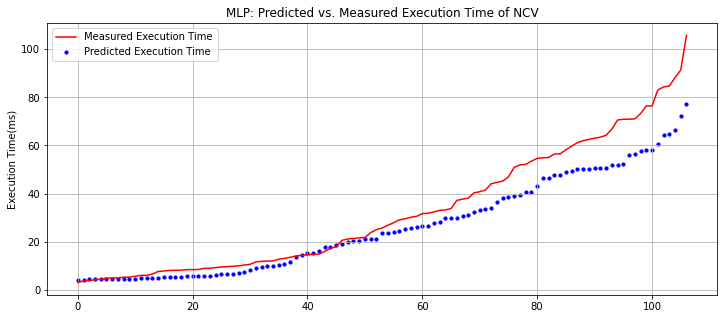

In [2]:
from time import time
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from itertools import product
from pandas.core.frame import DataFrame
import numpy as np
import csv
import matplotlib.pyplot as plt


train = pd.read_csv("training_data.csv")
x_train = train[["Total_number_of_FLOPs"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCV.csv")
x_test = df_pred[["Total_number_of_FLOPs"]] 
y_test = df_pred['Execution_time']

# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)
MAPE_default=10000
MAPE_better=MAPE_default
range_neuron_first_layer =range(6,12,1)
range_neuron_second_layer =range(6,12,1)
start = time()
for num_neuron_first_layer, num_neuron_second_layer in product(range_neuron_first_layer,range_neuron_second_layer):
    
    model = tf.keras.Sequential([tf.keras.layers.Dense(num_neuron_first_layer, activation = 'relu', input_shape = x_train.shape[1:]),
                                 tf.keras.layers.Dense(num_neuron_second_layer, activation = 'sigmoid'),
                                tf.keras.layers.Dense(1)])

    model.compile(loss = tf.losses.mean_squared_error,
                 optimizer = 'sgd')

    history = model.fit(x_train, y_train, epochs=200)

    y_valid_current = model.predict(x_valid)

    y_valid  = np.array(y_valid).reshape(-1,1)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid
    #print(per_err)

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    if ( MAPE < MAPE_better ):
        better_num_neuron_first_layer = num_neuron_first_layer
        better_num_neuron_second_layer = num_neuron_second_layer
        MAPE_better = MAPE

stop = time()
tunning_time = stop-start  
start = time()
model = tf.keras.Sequential([tf.keras.layers.Dense(better_num_neuron_first_layer, activation = 'sigmoid', input_shape = x_train.shape[1:]),
                             tf.keras.layers.Dense(better_num_neuron_second_layer, activation = 'sigmoid'),
                            tf.keras.layers.Dense(1)])
model.compile(loss = tf.losses.mean_squared_error,
                 optimizer = 'sgd')
history = model.fit(x_train, y_train, epochs=200)
training_time = stop-start
y_pred = model.predict(x_valid)

y_test  = np.array(y_valid).reshape(-1,1)
per_err = (y_test - y_pred) / y_test
per_err = abs(per_err)*100
MAPE = sum(per_err)/len(per_err)

MAPE = DataFrame(MAPE)  
# Print the MAPE value 

print(f"""MAPE of MLP  : {round(MAPE, 2)} 
 lowest MAPE in training process:" ,{MAPE_better}
the number of neurons of fist layer : { better_num_neuron_first_layer }
the number of neurons of second layer : { better_num_neuron_second_layer }
Tunning time : {tunning_time}s,
Training time : {training_time}s
     """)

y_test_sort=np.sort(y_test,axis=0)
y_pred_sort=np.sort(y_pred,axis=0)
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test_sort,"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred_sort,s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("MLP: Predicted vs. Measured Execution Time of NCV")
plt.show()

# Random Forest (RF)

        
        The current MAPE of Random Forest  : 25.66, 
        the number of estimator :4
        min_samples_leaf : 1 

        
        
        The current MAPE of Random Forest  : 22.65, 
        the number of estimator :4
        min_samples_leaf : 3 

        
        
        The current MAPE of Random Forest  : 20.15, 
        the number of estimator :4
        min_samples_leaf : 5 

        
        
        The current MAPE of Random Forest  : 20.12, 
        the number of estimator :4
        min_samples_leaf : 7 

        
        
The MAPE of Random Forest  : 23.54, 
the number of estimator :4
min_samples_leaf : 7 
Tunning time : 6.424968719482422s,
Training time : 0.0052165985107421875s




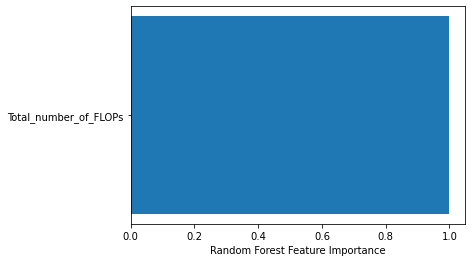

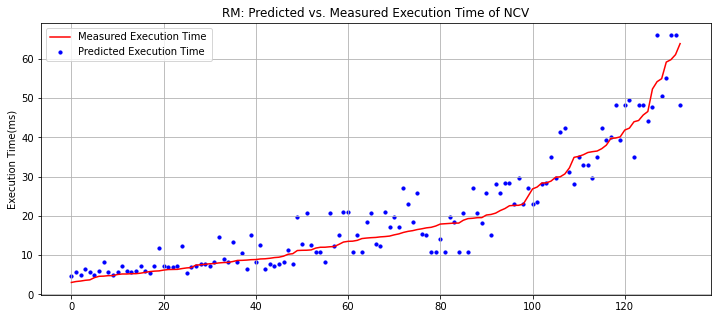

In [3]:
from time import time
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
from itertools import product
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model


train = pd.read_csv("training_data.csv")
x_train = train[["Total_number_of_FLOPs"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCV.csv")
x_test = df_pred[["Total_number_of_FLOPs"]] 
y_test = df_pred['Execution_time']

# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']




# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']



# df = pd.read_csv("training_data.csv")
# train, valid = train_test_split(df, test_size=0.2)
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons","Input_image_size","Number_of_layers"]]
# y_train = train['Execution_time']

# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons","Input_image_size","Number_of_layers"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("model_result_AlexNet_for_feature_importance.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Memory_allocated_by_activation_functions","Total_number_of_neurons","Input_image_size","Number_of_layers"]] 
# y_test = df_pred['Execution_time']

MAPE_default=10000
MAPE_better=MAPE_default
start = time()

range_n_estimators =range(4,100,4)
range_min_samples_leaf =range(1,10,2)
start = time()
for value_n_estimators, value_min_samples_leaf in product(range_n_estimators, range_min_samples_leaf):
    # Initializing the Random Forest Regression model with 50 decision trees
    model = RandomForestRegressor(n_estimators = value_n_estimators, random_state = 0, max_features = "auto", min_samples_leaf = value_min_samples_leaf)

    # Fitting the Random Forest Regression model to the data
    model.fit(x_train, y_train) 

    # Predicting the target values of the validation set
    y_valid_current = model.predict(x_valid)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)


    if ( MAPE < MAPE_better ):
        better_n_estimators = value_n_estimators
        better_min_samples_leaf = value_min_samples_leaf
        MAPE_better = MAPE
        print(f'''        
        The current MAPE of Random Forest  : { round(MAPE, 2) }, 
        the number of estimator :{ better_n_estimators }
        min_samples_leaf : {better_min_samples_leaf} 

        ''')
stop = time()
tunning_time = stop-start  
start = time()        
# Initializing the Random Forest Regression model with 50 decision trees
model = RandomForestRegressor(n_estimators = better_n_estimators, random_state = 0, max_features = "auto", min_samples_leaf = better_min_samples_leaf)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 
stop = time()
training_time = stop-start  
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)        
        
        
        
print(f'''        
The MAPE of Random Forest  : { round(MAPE, 2) }, 
the number of estimator :{ better_n_estimators }
min_samples_leaf : {better_min_samples_leaf} 
Tunning time : {tunning_time}s,
Training time : {training_time}s

''')
# plt.barh(x_train.columns, model.feature_importances_)
sorted_idx = model.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("RM: Predicted vs. Measured Execution Time of NCV")
plt.show()

# Support Vector Regression (SVR)

The lowest MAPE of SVR 24.47876474106196
The lowest MAPE of SVR 24.336042083090906
The lowest MAPE of SVR 24.261464194340785
The lowest MAPE of SVR 24.101291506606895
The lowest MAPE of SVR 23.934594646374904
The lowest MAPE of SVR 23.767055109334837
The lowest MAPE of SVR 23.60328165834784
The lowest MAPE of SVR 18.39999219468511
The lowest MAPE of SVR 18.070038493995565
The lowest MAPE of SVR 17.978019167362365
The lowest MAPE of SVR 17.92508991748772
The lowest MAPE of SVR 17.916931262970337
The lowest MAPE of SVR 17.899148409743123
The lowest MAPE of SVR 17.772975010934648
The lowest MAPE of SVR 17.67339754309683
The lowest MAPE of SVR 17.643026722579933
The lowest MAPE of SVR 17.63479407447093
The lowest MAPE of SVR 17.570969276264364
The lowest MAPE of SVR 17.53028194862638
The lowest MAPE of SVR 17.518759428528767
        
The MAPE of SVR  : 18.62, the value of hyperparameters :C = 37, epsilon = 0.09,
Tunning time : 2.759722948074341s,
Training time : 0.011444091796875s




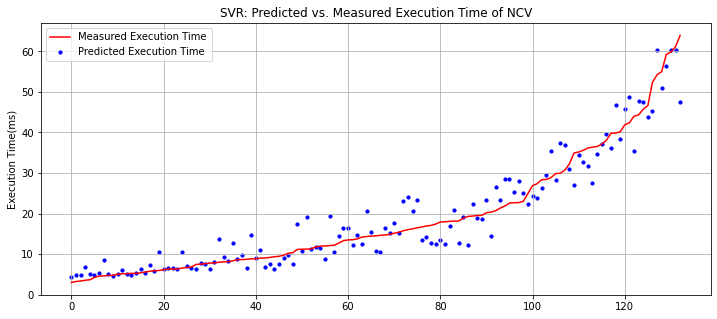

In [4]:
from time import time
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.model_selection import train_test_split
from itertools import product
# Sklearn
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR # for building SVR model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

train = pd.read_csv("training_data.csv")
x_train = train[["Total_number_of_FLOPs"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCV.csv")
x_test = df_pred[["Total_number_of_FLOPs"]] 
y_test = df_pred['Execution_time']

# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']




# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']



# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']


# ----------- Model fitting -----------

# model1 = LinearRegression()
# lr = model1.fit(x_train, y_train)
MAPE_default=10000
MAPE_better=MAPE_default
range_C =range(1,100,4)
range_epsilon =np.arange(0.01,0.3,0.04)
start = time()
for value_C, value_epsilon in product(range_C,range_epsilon):
    
    model2 = SVR(kernel='rbf', C=value_C, epsilon=value_epsilon) # set kernel and hyperparameters
    
    svr = model2.fit(x_train, y_train)

    # Predicting the target values of the test set
    y_valid_current = model2.predict(x_valid)

    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100

    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)

    # Print the MAPE value 
#     print(f'''
#     MAPE of Random Forest  : { round(MAPE, 2) }

#     ''')
    if ( MAPE < MAPE_better ):
        better_C = value_C
        better_epsilon = value_epsilon
        MAPE_better = MAPE
        print("The lowest MAPE of SVR",MAPE_better)
        
stop = time()
tunning_time = stop-start  
start = time()
model2 = SVR(kernel='rbf', C=better_C, epsilon=better_epsilon) # set kernel and hyperparameters

svr = model2.fit(x_train, y_train)

stop = time()
training_time = stop-start  

# Predicting the target values of the test set
y_pred = model2.predict(x_test)

# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100

# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)        
        
        
        
print(f'''        
The MAPE of SVR  : { round(MAPE, 2) }, the value of hyperparameters :C = {better_C}, epsilon = {better_epsilon},
Tunning time : {tunning_time}s,
Training time : {training_time}s

''')




index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("SVR: Predicted vs. Measured Execution Time of NCV")
plt.show()


# plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(y_test)),y_test[index],"r",label="original y")
# plt.scatter(np.arange(len(y_lr)),y_lr[index],s=3,c="b",label="prediction")
# plt.legend(loc="upper left")
# plt.grid()
# plt.xlabel("index")
# plt.ylabel("y")
# plt.title(":")
# plt.show()

# eXtreme Gradient Boosting (XGBoost)

        
        The lowest MAPE of XGBoost  : 76.36
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 3
        n_estimators = 2

        
        
        The lowest MAPE of XGBoost  : 46.88
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 3
        n_estimators = 6

        
        
        The lowest MAPE of XGBoost  : 30.56
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 3
        n_estimators = 10

        
        
        The lowest MAPE of XGBoost  : 22.78
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_depth = 3
        n_estimators = 14

        
        
        The lowest MAPE of XGBoost  : 19.69
        the value of hyperparameters :
        colsample_bytree = 0.5
        learning_rate = 0.1
        max_dep

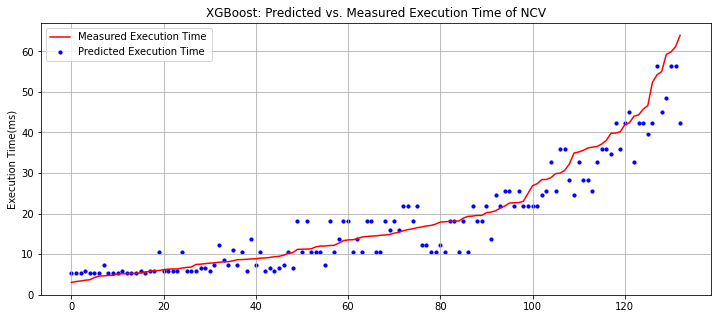

In [5]:
from time import time
import xgboost as xgb
import pandas as pd # for data manipulation
from itertools import product
from sklearn.model_selection import train_test_split
import numpy as np # for data manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline


train = pd.read_csv("training_data.csv")
x_train = train[["Total_number_of_FLOPs"]]
y_train = train['Execution_time']

valid = pd.read_csv("valid_data.csv")
x_valid = valid[["Total_number_of_FLOPs"]]
y_valid = valid['Execution_time']

df_pred = pd.read_csv("test_data_NCV.csv")
x_test = df_pred[["Total_number_of_FLOPs"]] 
y_test = df_pred['Execution_time']

# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters"]] 
# y_test = df_pred['Execution_time']




# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons"]] 
# y_test = df_pred['Execution_time']


# train = pd.read_csv("training_data.csv")
# x_train = train[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_train = train['Execution_time']

# valid = pd.read_csv("valid_data.csv")
# x_valid = valid[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]]
# y_valid = valid['Execution_time']

# df_pred = pd.read_csv("test_data_NCV.csv")
# x_test = df_pred[["Total_number_of_FLOPs","Total_trainable_parameters","Total_number_of_neurons","Memory_allocated_by_activation_functions"]] 
# y_test = df_pred['Execution_time']

MAPE_default=10000
MAPE_better=MAPE_default
range_colsample_bytree = np.arange(0.5,0.9,0.1)
range_learning_rate = np.arange(0.1,0.26,0.05)
range_max_depth = range(3,12,1)
range_n_estimators = range(2,60,4)
start = time()
for value_colsample_bytree, value_learning_rate, value_max_depth, value_n_estimators in product(range_colsample_bytree,range_learning_rate,range_max_depth,range_n_estimators):


    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = value_colsample_bytree, learning_rate =value_learning_rate,
                    max_depth = value_max_depth, n_estimators = value_n_estimators)
    xg_reg.fit(x_train,y_train)

    y_valid_current = xg_reg.predict(x_valid)
    # Calculate percentage error
    per_err = (y_valid - y_valid_current) / y_valid

    # Take absolute value of the percentage error (APE)
    per_err = abs(per_err)*100


    # Calculate the MAPE
    MAPE = sum(per_err)/len(per_err)


    if ( MAPE < MAPE_better ):
        better_colsample_bytree = value_colsample_bytree
        better_learning_rate = value_learning_rate
        better_max_depth = value_max_depth
        better_n_estimators = value_n_estimators
        MAPE_better = MAPE

                
        print(f'''        
        The lowest MAPE of XGBoost  : { round(MAPE_better, 2) }
        the value of hyperparameters :
        colsample_bytree = {better_colsample_bytree}
        learning_rate = {better_learning_rate}
        max_depth = {better_max_depth}
        n_estimators = {better_n_estimators}

        ''')
stop = time()
tunning_time = stop-start  
start = time()        
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = better_colsample_bytree, learning_rate =better_learning_rate,
                max_depth = better_max_depth, n_estimators = better_n_estimators)
xg_reg.fit(x_train,y_train)
stop = time()
training_time = stop-start 
y_pred = xg_reg.predict(x_test)
# Calculate percentage error
per_err = (y_test - y_pred) / y_test

# Take absolute value of the percentage error (APE)
per_err = abs(per_err)*100


# Calculate the MAPE
MAPE = sum(per_err)/len(per_err)
print(f'''        
The MAPE of XGBoost  : { round(MAPE, 2) }
the value of hyperparameters :
colsample_bytree = {better_colsample_bytree}
learning_rate = {better_learning_rate}
max_depth = {better_max_depth}
n_estimators = {better_n_estimators}
Tunning time : {tunning_time}s,
Training time : {training_time}s

''')
index=np.argsort(y_test)

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(y_test)),y_test[index],"r",label="Measured Execution Time")
plt.scatter(np.arange(len(y_pred)),y_pred[index],s=10,c="b",label="Predicted Execution Time ")
plt.legend(loc="upper left")
plt.grid()
plt.ylabel("Execution Time(ms)")
plt.title("XGBoost: Predicted vs. Measured Execution Time of NCV")
plt.show()